# Spacy v3

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download es_core_news_md

In [ ]:



import spacy
from spacy import displacy

colors = {"LOC": "#FFB700", "MISC":"#F3D850", "ORG": "#889AFD", "PER": "#5C40D0"}
colors_2 = {"LOC": "#F94D67", "MISC":"#2257EC", "ORG": "#FF9696", "PER": "#7A8BE6"}

text = """
Margaret Hamilton (Paoli, Indiana, 17 de agosto de 1936) es una científica computacional, matemática e ingeniera de Software estadounidense.
Fue directora de la División de Ingeniería de Software del Laboratorio de Instrumentación del MIT,
donde con su equipo desarrolló el software de navegación "on-board" para el Programa Espacial Apolo.
Fue fundadora, en 1976, de la empresa Higher Order Software.
En 1986, se convirtió en la fundadora y CEO de Hamilton Technologies, en Cambridge, Massachusetts.
"""

nlp = spacy.load("es_core_news_md")
doc = nlp(text)

options_1 = {"ents": ["LOC", "MISC", "ORG", "PER"], "colors": colors}
options_2 = {"ents": ["LOC", "MISC", "ORG", "PER"], "colors": colors_2}
#displacy.render(doc, style="ent", jupyter= True ,options=options_1)
#displacy.render(doc, style="ent", jupyter= True ,options=options_2)
displacy.render(doc, style="ent", jupyter= True)

for ent in doc.ents:
    print('{' + ent.text + ent.start_char + ent.end_char + ent.label_+'},')

TypeError: ignored

##spaCy 101
Curso introductorio corto ofrecido en la pagina.

In the first chapter, you learned how to extract linguistic features like part-of-speech tags, syntactic dependencies and named entities, and how to work with trained pipelines.

You also learned to write powerful match patterns to extract words and phrases using spaCy's matcher and phrase matcher.

Chapter 2 was all about information extraction, and you learned how to work with the data structures, the Doc, Token and Span, as well as the Vocab and lexical entries.

You also used spaCy to predict semantic similarities using word vectors.

In chapter 3, you got some more insights into spaCy's pipeline, and learned to write your own custom pipeline components that modify the doc.

You also created your own custom extension attributes for docs, tokens and spans, and learned about processing streams and making your pipeline faster.

Finally, in chapter 4, you learned about training and updating spaCy's statistical models, specifically the entity recognizer.

You learned some useful tricks for how to create training data, and how to design your label scheme to get the best results.

###Chapter 1

In [ ]:
# Import spaCy
import spacy

# Create the Spanish nlp object
nlp = spacy.blank("es")

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

¿Cómo estás?


In [ ]:
# Import spaCy and create the English nlp object
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

I
tree kangaroos
tree kangaroos and narwhals


In [ ]:
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i+1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


In [ ]:
import spacy

# Load the "en_core_web_sm" pipeline
nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")
print("")
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

It          PRON      nsubj     
’s          VERB      ROOT      
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # Print the entity text and label
    print(ent.text, ent.label_)

# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print("Missing entity:", iphone_x.text)

Apple ORG
Missing entity: iPhone X


Matcher

In [ ]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)


#match_id: hash value of the pattern name
#start: start index of matched span
#end: end index of matched span


iPhone X


In [ ]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
matcher.add("PATTERN", [pattern])
doc = nlp("2018 FIFA World Cup: France won!")
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)


2018 FIFA World Cup:


In [ ]:
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]
matcher.add("PATTERN", [pattern])
doc = nlp("I loved dogs but now I love cats more.")
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)


loved dogs
love cats


In [ ]:
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]
doc = nlp("I bought a smartphone. Now I'm buying apps.")
matcher.add("PATTERN", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

print("Matches:", [doc[start:end].text for match_id, start, end in matches])

bought a smartphone
buying apps
Matches: ['bought a smartphone', 'buying apps']


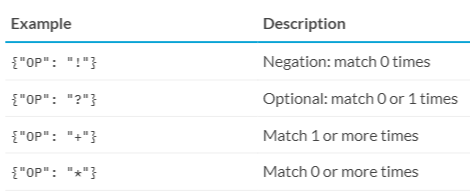

### Chapter 2

* Vocab: stores data shared across multiple documents
* To save memory, spaCy encodes all strings to hash values
* Strings are only stored once in the StringStore via nlp.vocab.strings
* String store: lookup table in both directions

In [ ]:
import spacy
nlp = spacy.blank("en")
doc = nlp("I love coffee")

print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


In [ ]:
import spacy
nlp = spacy.blank("en")
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]
# Hashes can't be reversed – that's why we need to provide the shared vocab
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

print(coffee_string, ":", coffee_hash)

coffee : 3197928453018144401


In [ ]:
import spacy
nlp = spacy.blank("en")
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


In [ ]:
import spacy
# Import the Doc class
from spacy.tokens import Doc, Span

# Create an nlp object
nlp = spacy.blank("en")

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

Found proper noun before a verb: Berlin


spaCy can compare two objects and predict similarity

Doc.similarity(), Span.similarity() and Token.similarity()

Take another object and return a similarity score (0 to 1)

Important: needs a pipeline that has word vectors included, for example:

✅ en_core_web_md (medium)

✅ en_core_web_lg (large)

🚫 NOT en_core_web_sm (small)

In [ ]:
import spacy
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.8698332283318978
0.1821369691957915
0.47190033157126826


But how does spaCy do this under the hood?

Similarity is determined using word vectors, multi-dimensional representations of meanings of words.

You might have heard of Word2Vec, which is an algorithm that's often used to train word vectors from raw text.

Vectors can be added to spaCy's pipelines.

By default, the similarity returned by spaCy is the cosine similarity between two vectors – but this can be adjusted if necessary.

Vectors for objects consisting of several tokens, like the Doc and Span, default to the average of their token vectors.

That's also why you usually get more value out of shorter phrases with fewer irrelevant words.

In [ ]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 0.20778  -2.4151    0.36605   2.0139   -0.23752  -3.1952   -0.2952
  1.2272   -3.4129   -0.54969   0.32634  -1.0813    0.55626   1.5195
  0.97797  -3.1816   -0.37207  -0.86093   2.1509   -4.0845    0.035405
  3.5702   -0.79413  -1.7025   -1.6371   -3.198    -1.9387    0.91166
  0.85409   1.8039   -1.103    -2.5274    1.6365   -0.82082   1.0278
 -1.705     1.5511   -0.95633  -1.4702   -1.865    -0.19324  -0.49123
  2.2361    2.2119    3.6654    1.7943   -0.20601   1.5483   -1.3964
 -0.50819   2.1288   -2.332     1.3539   -2.1917    1.8923    0.28472
  0.54285   1.2309    0.26027   1.9542    1.1739   -0.40348   3.2028
  0.75381  -2.7179   -1.3587   -1.1965   -2.0923    2.2855   -0.3058
 -0.63174   0.70083   0.16899   1.2325    0.97006  -0.23356  -2.094
 -1.737     3.6075   -1.511    -0.9135    0.53878   0.49268   0.44751
  0.6315    1.4963    4.1725    2.1961   -1.2409    0.4214    2.9678
  1.841     3.0133   -4.4652    0.96521  -0.29787   4.3386   -1.2527
 -1.7734   -3.5637   -0.20035

In [ ]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))
#Frases similares no implican significado similar

0.9530094042245597


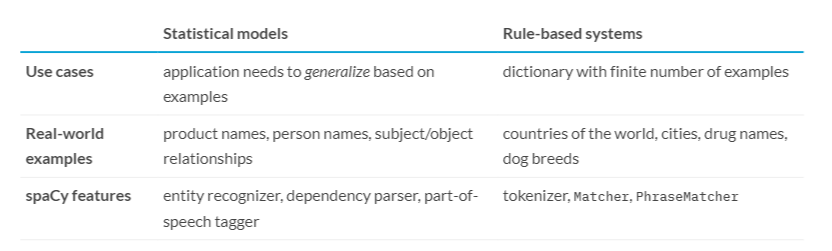

In [ ]:
# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", [pattern])

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", [pattern])

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

In [ ]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {"TEXT": "-"}, {"LOWER": "free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


In [ ]:
import json
import spacy

with open("exercises/en/countries.json", encoding="utf8") as f: #Deberia tener cargado este archivo
    COUNTRIES = json.loads(f.read())

nlp = spacy.blank("en")
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
with open("exercises/en/country_text.txt", encoding="utf8") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

### Chapter 3

Processing Pipelines

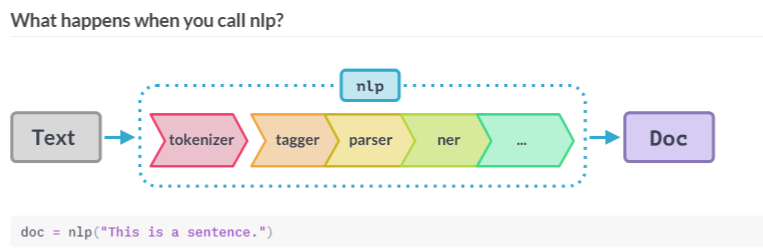

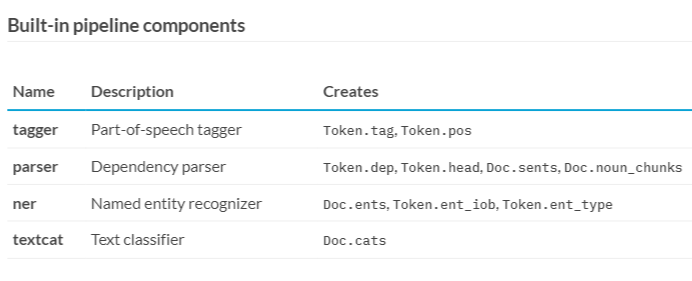

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

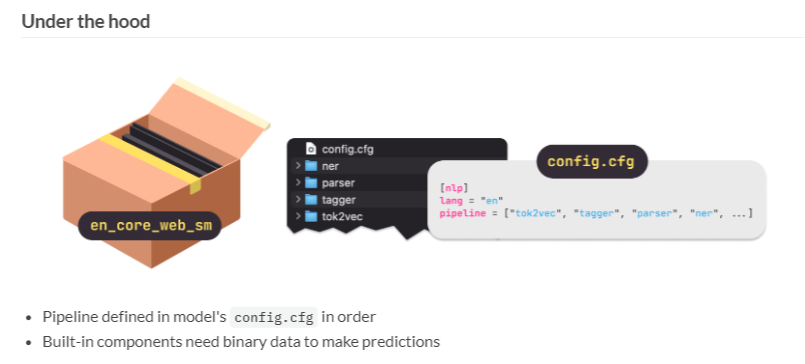

All pipeline packages you can load into spaCy include several files and a config.cfg.

The config defines things like the language and pipeline. This tells spaCy which components to instantiate and how they should be configured.

The built-in components that make predictions also need binary data. The data is included in the pipeline package and loaded into the component when you load the pipeline.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7f7319ba7c90>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7f7319ba7ec0>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7f7313a337d0>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7f731ddc4320>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7f731de75460>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f7313a3be50>)]


####Custom pipeline components
Fundamentally, a pipeline component is a function or callable that takes a doc, modifies it and returns it, so it can be processed by the next component in the pipeline.

To tell spaCy where to find your custom component and how it should be called, you can decorate it using the @Language.component decorator. Just add it to the line right above the function definition.

Once a component is registered, it can be added to the pipeline using the nlp.add_pipe method. The method takes at least one argument: the string name of the component.

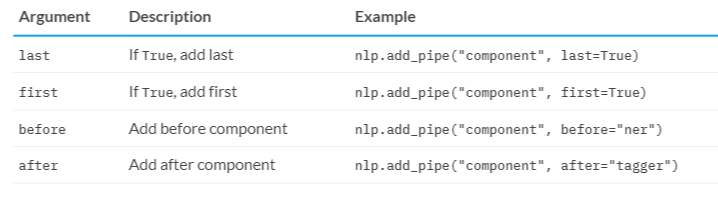

In [ ]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

<function __main__.custom_component_function(doc)>

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Process a text
doc = nlp("Hello world!")

Doc length: 3


In [ ]:
import spacy
from spacy.language import Language

# Define the custom component
@Language.component("length_component")
def length_component_function(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc


# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe("length_component", first=True)
print(nlp.pipe_names)

# Process a text
doc = nlp("this is a text to test the new pipe")

['length_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
This document is 9 tokens long.


In [ ]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever in Apple. Facebook is really good. Maria told me.")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I have a cat and a Golden Retriever in Apple. Facebook is really good. Maria told me.")
print([(ent.text, ent.label_) for ent in doc.ents])

#El componente nuevo me pisa otro tipo de entidades.

[('a Golden Retriever', 'FAC'), ('Apple', 'ORG'), ('Maria', 'PERSON')]


#### Atributos
Add custom metadata to documents, tokens and spans
Accessible via the ._ property

In [ ]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)

doc._.title = "My document"
token._.is_color = True
span._.has_color = False

In [ ]:
from spacy.tokens import Token

# Set extension on the Token with default value
Token.set_extension("is_color", default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

In [ ]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("is_color", getter=get_is_color, force=True)  #El force = true es para sobreescribir el is_color si ya existe

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

True - blue


In [ ]:
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

True - sky is blue
False - The sky


In [ ]:
# Assign a function that becomes available as an object method
# Lets you pass arguments to the extension function
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

True - blue
False - cloud


In [ ]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("en")

# Register the Token extension attribute "is_country" with the default value False
Token.set_extension("is_country", default =False)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

In [ ]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("en")

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]


# Register the Token property extension "reversed" with the getter get_reversed
Token.set_extension("reversed", getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print("reversed:", token._.reversed)

In [ ]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")

def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_")
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text

# Set the Span extension wikipedia_url using the getter get_wikipedia_url
Span.set_extension("wikipedia_url", getter=get_wikipedia_url)

doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

over fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


#### Escalabilidad y Performance

* Use nlp.pipe method
* Processes texts as a stream, yields Doc objects
* Much faster than calling nlp on each text

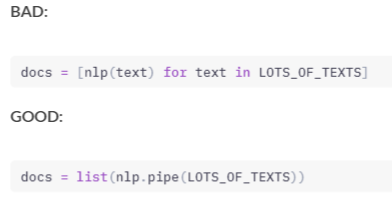

nlp.pipe also supports passing in tuples of text / context if you set as_tuples to True.

The method will then yield doc / context tuples.

This is useful for passing in additional metadata, like an ID associated with the text, or a page number.

In [ ]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

This is a text 15
And another text 16


In [ ]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

Another common scenario: Sometimes you already have a model loaded to do other processing, but you only need the tokenizer for one particular text.

Running the whole pipeline is unnecessarily slow, because you'll be getting a bunch of predictions from the model that you don't need.

In [ ]:
doc = nlp.make_doc("Hello world!") #solo tokenizo

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "This is a sentence"
# Use nlp.select_pipes to temporarily disable one or more pipes
# Disable tagger and parser
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

()


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
import json
import spacy
from spacy.tokens import Doc

with open("exercises/en/bookquotes.json", encoding="utf8") as f: #faltaria este archivo
    DATA = json.loads(f.read())

nlp = spacy.blank("en")

# Register the Doc extension "author" (default None)
Doc.set_extension("author", default=None)

# Register the Doc extension "book" (default None)
Doc.set_extension("book", default=None)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context["book"]
    doc._.author = context["author"]

    # Print the text and custom attribute data
    print(f"{doc.text}\n — '{doc._.book}' by {doc._.author}\n")

###Chapter 4
Training a neural network model

1. Initialize the model weights randomly
2. Predict a few examples with the current weights
3. Compare prediction with true labels
4. Calculate how to change weights to improve predictions
5. Update weights slightly
6. Go back to 2.

spaCy supports updating existing models with more examples, and training new models. If we're not starting with a trained pipeline, we first initialize the weights randomly.

Next, spaCy calls nlp.update, which predicts a batch of examples with the current weights.

The model then checks the predictions against the correct answers, and decides how to change the weights to achieve better predictions next time.

Finally, we make a small correction to the current weights and move on to the next batch of examples.

spaCy then continues calling nlp.update for each batch of examples in the data. During training, you usually want to make multiple passes over the data and train until the model stops improving.

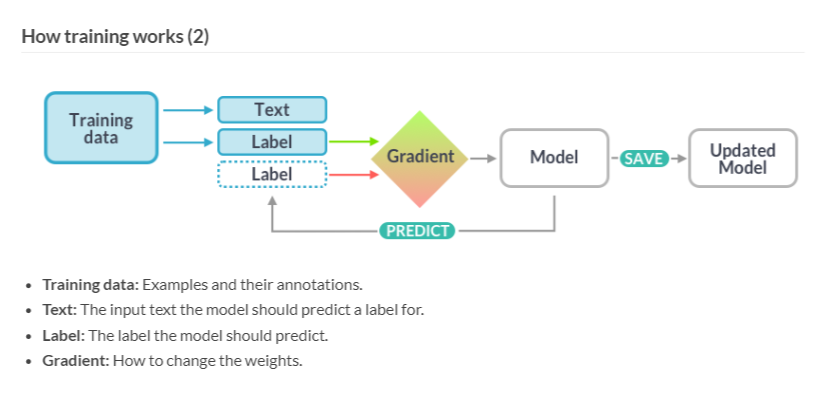

The training data are the examples we want to update the model with.

The text should be a sentence, paragraph or longer document. For the best results, it should be similar to what the model will see at runtime.

The label is what we want the model to predict. This can be a text category, or an entity span and its type.

The gradient is how we should change the model to reduce the current error. It's computed when we compare the predicted label to the true label.

After training, we can then save out an updated model and use it in our application.

In [ ]:
doc = nlp("iPhone X is coming")
doc.ents = [Span(doc, 0, 2, label="GADGET")]

doc = nlp("I need a new phone! Any tips?")
doc.ents = []

Examples of what we want the model to predict in context
* Update an existing model: a few hundred to a few thousand examples
* Train a new category: a few thousand to a million examples
spaCy's English models: 2 million words

In [ ]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("en")

# Create a Doc with entity spans
doc1 = nlp("iPhone X is coming")
doc1.ents = [Span(doc1, 0, 2, label="GADGET")]
# Create another doc without entity spans
doc2 = nlp("I need a new phone! Any tips?")

docs = [doc1, doc2]  # and so on...

random.shuffle(docs)
train_docs = docs[:len(docs) // 2]
dev_docs = docs[len(docs) // 2:]

DocBin: container to efficiently store and save Doc objects
can be saved to a binary file
binary files are used for training

You typically want to store your training and development data as files on disk so you can load them into spaCy's training process.

The DocBin is a container for efficiently storing and serializing Doc objects. You can instantiate it with a list of Doc objects and call its to_disk method to save it to a binary file. We typically use the file extension .spacy for these files.

Compared to other binary serialization protocols like pickle, the DocBin is faster and produces smaller file sizes because it only stores the shared vocabulary once. You can read more about how it works in the documentation.

In [ ]:
# Create and save a collection of training docs
train_docbin = DocBin(docs=train_docs)
train_docbin.to_disk("./train.spacy")
# Create and save a collection of evaluation docs
dev_docbin = DocBin(docs=dev_docs)
dev_docbin.to_disk("./dev.spacy")

In some cases, you might already have training and development data in a common format – for example, CoNLL or IOB. spaCy's convert command automatically converts these files into spaCy's binary format. It also converts JSON files in the old format used by spaCy v2.

spacy convert lets you convert corpora in common formats
supports .conll, .conllu, .iob and spaCy's old JSON format

In [ ]:
! python -m spacy convert ./train.gold.conll ./corpus

Create training data : Matcher

In [ ]:
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span, DocBin

with open("exercises/en/iphone.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)
# Add patterns to the matcher
pattern1 = ([{"LOWER": "iphone"}, {"LOWER": "x"}])
pattern2 = [{"LOWER": "iphone"}, {"IS_DIGIT": True}]
matcher.add("GADGET", [pattern1, pattern2])
docs = []
for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    doc.ents = spans
    docs.append(doc)

doc_bin = DocBin(docs=docs)
doc_bin.to_disk("./train.spacy")

spaCy uses a config file, usually called config.cfg, as the "single source of truth" for all settings. The config file defines how to initialize the nlp object, which pipeline components to add and how their internal model implementations should be configured. It also includes all settings for the training process and how to load the data, including hyperparameters.

Instead of providing lots of arguments on the command line or having to remember to define every single setting in code, you only need to pass your config file to spaCy's training command.

Config files also help with reproducibility: you'll have all settings in one place and always know how your pipeline was trained. You can even check your config file into a Git repo to version it and share it with others so they can train the same pipeline with the same settings.

The config is grouped into sections, and nested sections are defined using a dot. For example, [components.ner.model] defines the settings for the named entity recognizer's model implementation.

Config files can also reference Python functions using the @ notation. For example, the tokenizer defines a registered tokenizer function. You can use this to customize different parts of the nlp object and training – from plugging in your own tokenizer, all the way to implementing your own model architectures. But let's not worry about this for now – what you'll learn in this chapter will simply use the defaults spaCy provides out-of-the-box!

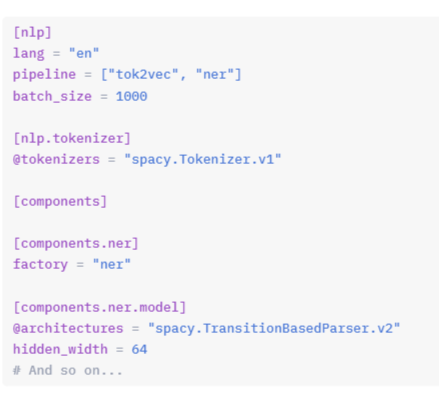

* init config: the command to run
* config.cfg: output path for the generated config
* --lang: language class of the pipeline, e.g. en for English
* --pipeline: comma-separated names of components to include



In [ ]:
! python -m spacy init config ./config.cfg --lang en --pipeline ner

In [ ]:
! python -m spacy train ./config.cfg --output ./output --paths.train train.spacy --paths.dev dev.spacy

In [ ]:
!python -m spacy train ./exercises/en/config_gadget.cfg --output ./output --paths.train ./exercises/en/train_gadget.spacy --paths.dev ./exercises/en/dev_gadget.spacy

* train: the command to run
* config.cfg: the path to the config file
* --output: the path to the output directory to save the trained pipeline
* --paths.train: override with path to the training data
* --paths.dev: override with path to the evaluation data

To train a pipeline, all you need is the config file and the training and development data. These are the .spacy files you already worked with in the previous exercises.

The first argument of spacy train is the path to the config file. The --output argument lets you specify a directory for saving the final trained pipeline.

You can also override different config settings on the command line. In this case, we override paths.train using the path to the train.spacy file and paths.dev using the dev.spacy file.

To make it easy to deploy your pipelines, spaCy provides a handy command to package them as Python packages. The spacy package command takes the path to your exported pipeline and an output directory. It then generates a Python package containing your pipeline. The Python package is a .tar.gz file and can be installed into your environment.

You can also provide an optional name and version on the command. This lets you manage multiple different versions of a pipeline, for example, if you decide to customize your pipeline later or train it with more data.

The package behaves just like any other Python package. After installation, you can load your pipeline using its name. Note that spaCy will automatically add the language code to the name. So your pipeline my_pipeline will become en_my_pipeline.


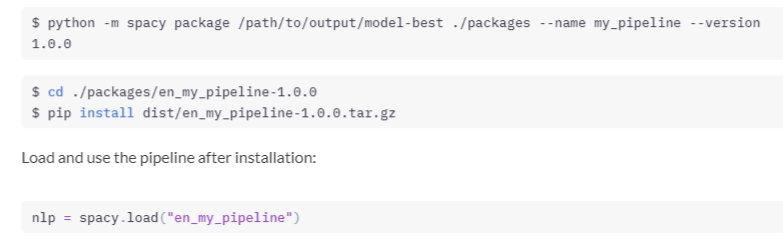

common problem is that your model just won't learn what you want it to.

spaCy's models make predictions based on the local context – for example, for named entities, the surrounding words are most important.

If the decision is difficult to make based on the context, the model can struggle to learn it.

The label scheme also needs to be consistent and not too specific.

For example, it may be very difficult to teach a model to predict whether something is adult clothing or children's clothing based on the context. However, just predicting the label "clothing" may work better.

## Documentacion

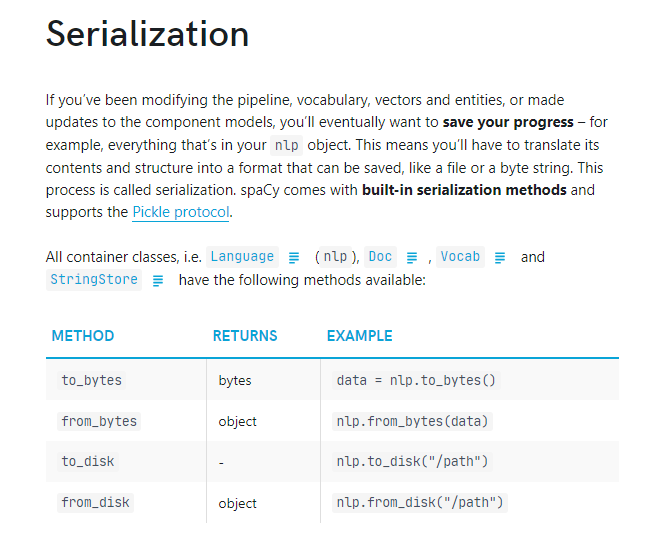

### Training
spaCy’s tagger, parser, text categorizer and many other components are powered by statistical models. Every “decision” these components make – for example, which part-of-speech tag to assign, or whether a word is a named entity – is a prediction based on the model’s current weight values. The weight values are estimated based on examples the model has seen during training. To train a model, you first need training data – examples of text, and the labels you want the model to predict. This could be a part-of-speech tag, a named entity or any other information.

Training is an iterative process in which the model’s predictions are compared against the reference annotations in order to estimate the gradient of the loss. The gradient of the loss is then used to calculate the gradient of the weights through backpropagation. The gradients indicate how the weight values should be changed so that the model’s predictions become more similar to the reference labels over time.

When training a model, we don’t just want it to memorize our examples – we want it to come up with a theory that can be generalized across unseen data. After all, we don’t just want the model to learn that this one instance of “Amazon” right here is a company – we want it to learn that “Amazon”, in contexts like this, is most likely a company. That’s why the training data should always be representative of the data we want to process. A model trained on Wikipedia, where sentences in the first person are extremely rare, will likely perform badly on Twitter. Similarly, a model trained on romantic novels will likely perform badly on legal text.

This also means that in order to know how the model is performing, and whether it’s learning the right things, you don’t only need training data – you’ll also need evaluation data. If you only test the model with the data it was trained on, you’ll have no idea how well it’s generalizing. If you want to train a model from scratch, you usually need at least a few hundred examples for both training and evaluation.

### Training config and lifecycle
Training config files include all settings and hyperparameters for training your pipeline. Instead of providing lots of arguments on the command line, you only need to pass your config.cfg file to spacy train. This also makes it easy to integrate custom models and architectures, written in your framework of choice. A pipeline’s config.cfg is considered the “single source of truth”, both at training and runtime.

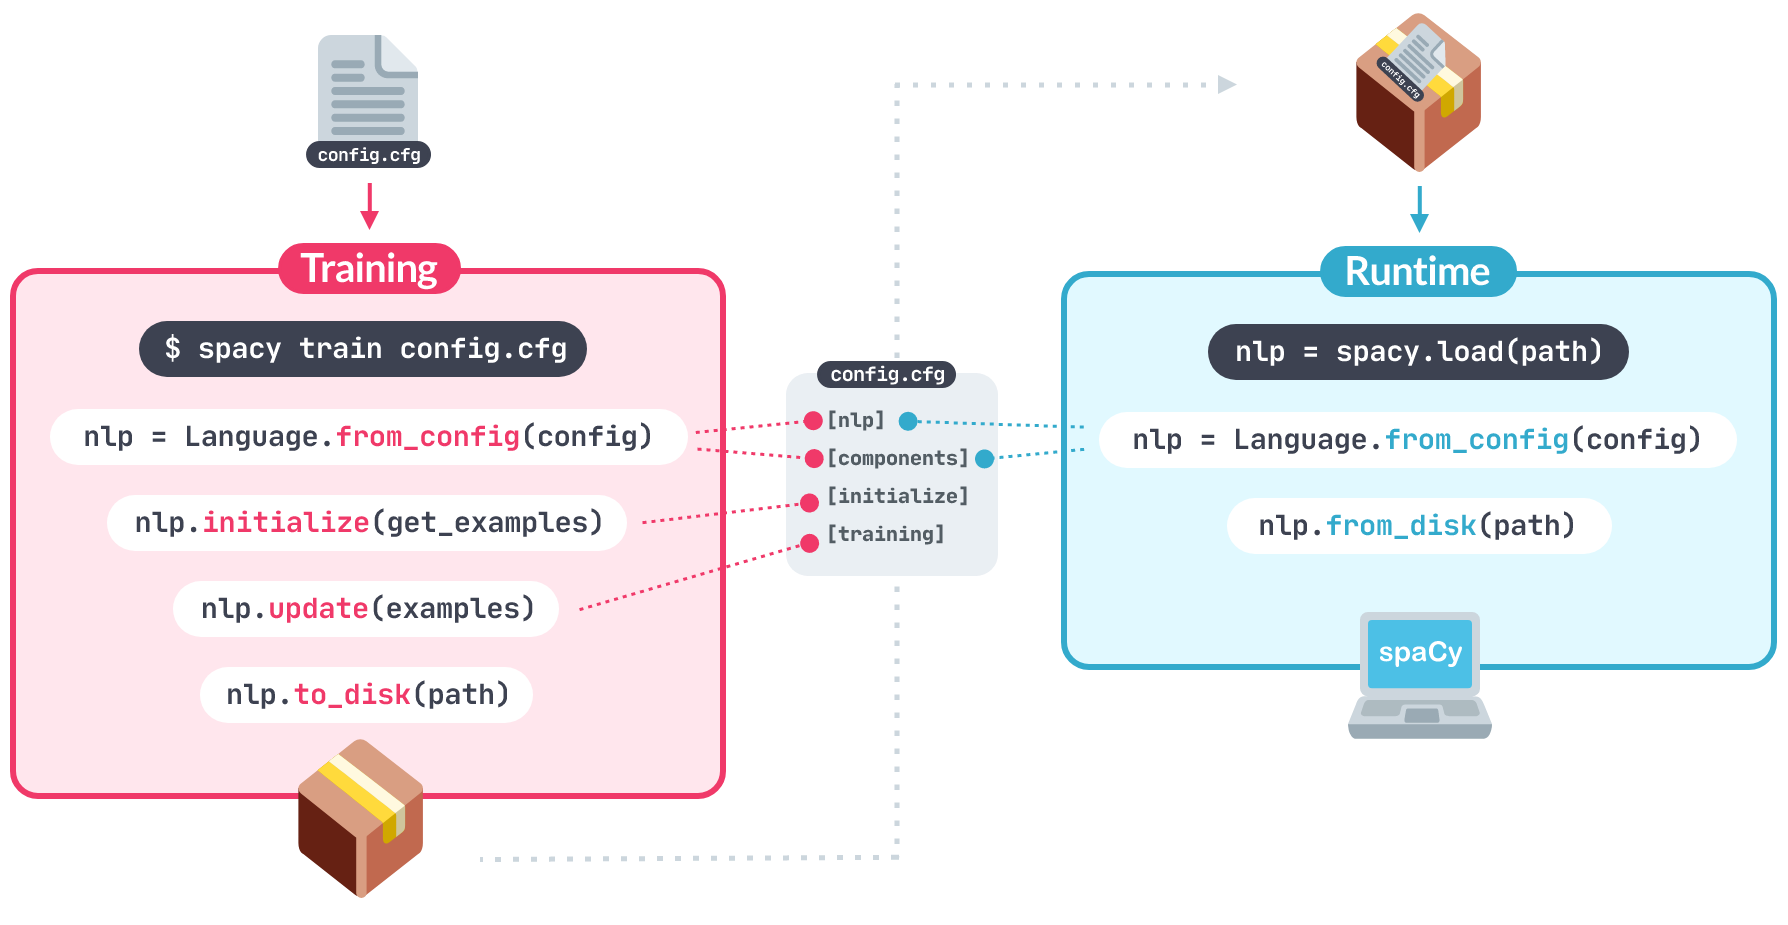

### Trainable components
spaCy’s Pipe class helps you implement your own trainable components that have their own model instance, make predictions over Doc objects and can be updated using spacy train. This lets you plug fully custom machine learning components into your pipeline that can be configured via a single training config.

In [ ]:
##ejemplo (no correr)
[components.my_component]
factory = "my_component"

[components.my_component.model]
@architectures = "my_model.v1"
width = 128

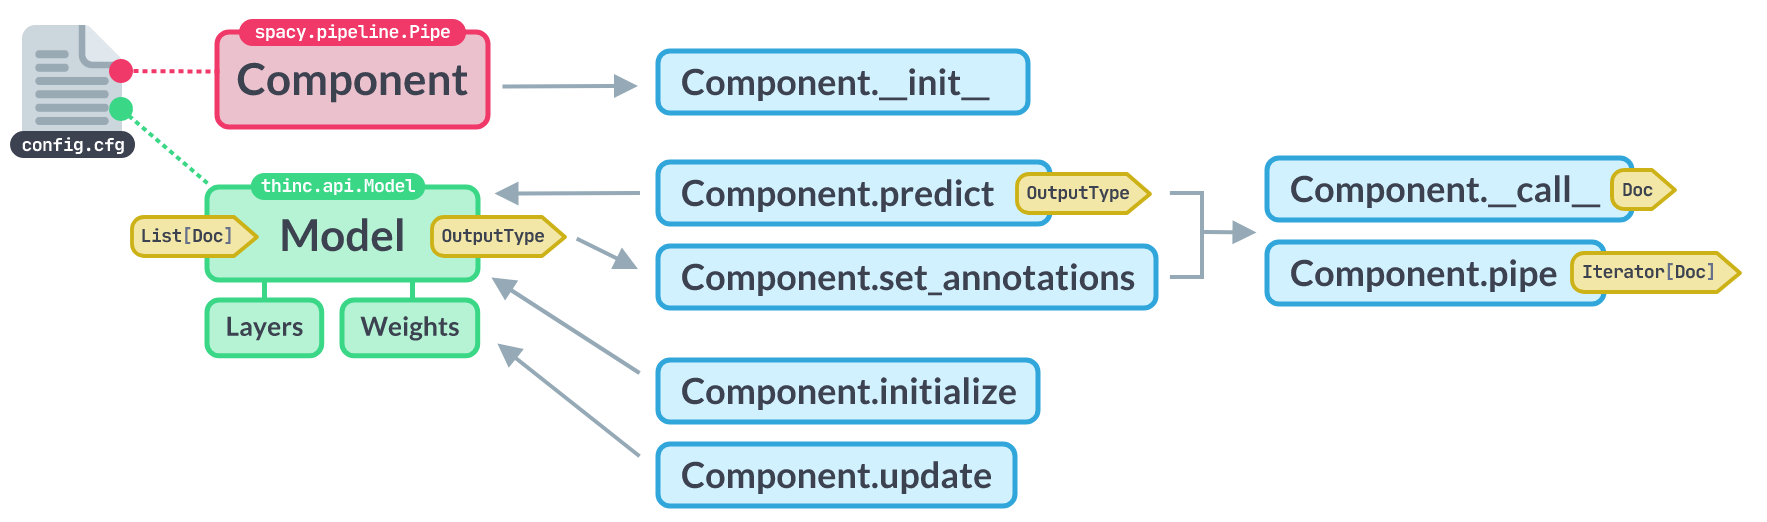

-> Esto puede llegar a ser interesante
Every language is different – and usually full of exceptions and special cases, especially amongst the most common words. Some of these exceptions are shared across languages, while others are entirely specific – usually so specific that they need to be hard-coded. The lang module contains all language-specific data, organized in simple Python files. This makes the data easy to update and extend.

The shared language data in the directory root includes rules that can be generalized across languages – for example, rules for basic punctuation, emoji, emoticons and single-letter abbreviations. The individual language data in a submodule contains rules that are only relevant to a particular language. It also takes care of putting together all components and creating the Language subclass – for example, English or German. The values are defined in the Language.Defaults.

### Projects
spaCy projects let you manage and share end-to-end spaCy workflows for different use cases and domains, and orchestrate training, packaging and serving your custom pipelines. You can start off by cloning a pre-defined project template, adjust it to fit your needs, load in your data, train a pipeline, export it as a Python package, upload your outputs to a remote storage and share your results with your team.

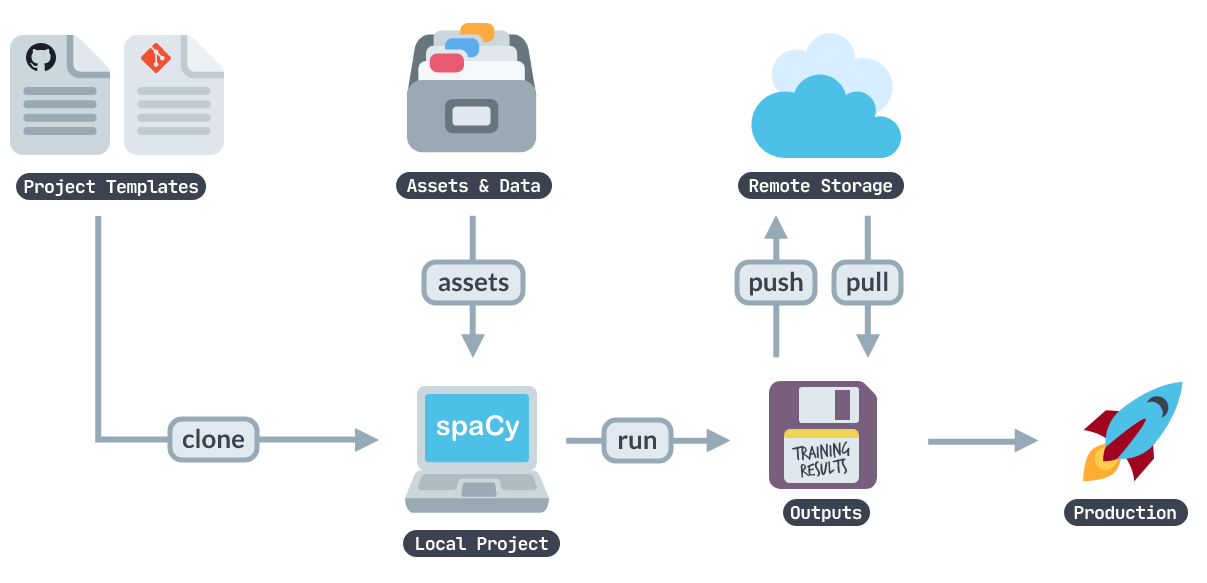

In [ ]:
# Clone a project template
python -m spacy project clone pipelines/tagger_parser_ud
cd tagger_parser_ud
# Download data assets
python -m spacy project assets
# Run a workflow
python -m spacy project run all

spaCy projects also make it easy to integrate with other tools in the data science and machine learning ecosystem, including DVC for data version control, Prodigy for creating labelled data, Streamlit for building interactive apps, FastAPI for serving models in production, Ray for parallel training, Weights & Biases for experiment tracking, and more!

### custom pipes

Defining, configuring, reusing, training and analyzing pipeline components is now easier and more convenient. The @Language.component and @Language.factory decorators let you register your component, define its default configuration and meta data, like the attribute values it assigns and requires. Any custom component can be included during training, and sourcing components from existing trained pipelines lets you mix and match custom pipelines. The nlp.analyze_pipes method outputs structured information about the current pipeline and its components, including the attributes they assign, the scores they compute during training and whether any required attributes aren’t set.

In [ ]:
@Language.component("my_component")
def my_component(doc):
    return doc

nlp.add_pipe("my_component")
nlp.add_pipe("ner", source=other_nlp)
nlp.analyze_pipes(pretty=True)

## Guides

In [ ]:
#When using nlp.pipe, keep in mind that it returns a generator that yields Doc objects – not a list.
# So if you want to use it like a list, you’ll have to call list() on it first:

- docs = nlp.pipe(texts)[0]         # will raise an error
+ docs = list(nlp.pipe(texts))[0]   # works as expected

You can use the as_tuples option to pass additional context along with each doc when using nlp.pipe. If as_tuples is True, then the input should be a sequence of (text, context) tuples and the output will be a sequence of (doc, context) tuples. For example, you can pass metadata in the context and save it in a custom attribute:

In [ ]:
import spacy
from spacy.tokens import Doc

if not Doc.has_extension("text_id"):
    Doc.set_extension("text_id", default=None)

text_tuples = [
    ("This is the first text.", {"text_id": "text1"}),
    ("This is the second text.", {"text_id": "text2"})
]

nlp = spacy.load("en_core_web_sm")
doc_tuples = nlp.pipe(text_tuples, as_tuples=True)

docs = []
for doc, context in doc_tuples:
    doc._.text_id = context["text_id"]
    docs.append(doc)

for doc in docs:
    print(f"{doc._.text_id}: {doc.text}")

### Embeddings, Transformers and Transfer Learning

https://spacy.io/usage/embeddings-transformers